# Exam 1 - Python Portion
## Intro to Sinusoids and FFT

In class, we have said that all of the signals we encounter can be decomposed into component sinusoidal signals through the Fourier Transform. This lab is intended to give you a more intuitive feel for working with sinusoidal signals by relating them to musical notes that you can hear. We will also introduce the Fast Fourier Transform (FFT). This is essentially a digital version of the Fourier Transform we have worked with in class. We won't go into all of the details of how in works under the hood, but we will give some examples of how you can use the python FFT libraries to do some very basic frequency analysis.

## Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

**Modified play function:**

In [2]:
def play(x, fs, autoplay=False, normalize=True):
    display(Audio(x, rate=fs, autoplay=autoplay, normalize=normalize))

In [3]:
# Matplotlib settings to make the plots look a little nicer.

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (10,6)

# Analyzing a Sinusoid

### Time Vector
A sinusoid is any signal that has the shape of a sine or cosine. Note that sine and cosine are really the same function, just starting a different points in time. This shift in time is known as a phase shift. A sinsoid will take the general form of:

$$x(t) = A \cos(2 \pi F_0 t + \phi)$$

Here, $A$ is the amplitude, $F_0$ is the frequency, $t$ is the time vector, and $\phi$ is the phase shift in radians. If $t$ is measured in seconds, then $F_0$ is in Hertz [Hz].

For this lab, let's define a single time vector for all of our sinsoids. We will use the standard audio sampling rate of 44.1 kHz and make the time vector 1 second in length.

In [4]:
# Create time vector
fs    = 44100.  # Standard Audio Sampling Frequency
Ts    = 1./fs   # Convert to sampling period

t_max = 1                 # Time max in seconds.
N     = t_max*fs          # Total number of samples
k     = np.arange(0,N+1)  # Integer time index vector

t     = k*Ts # Time vector in seconds

In [5]:
# Print the time vector
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99954649e-01, 9.99977324e-01, 1.00000000e+00])

### Generating, Plotting, and Playing a Sinusoid
Now let's define a sinsoidal signal with amplidtude $A=1$, frequency of $F_0 = 261.63$ Hz, and phase $\phi=0$. I chose $F_0 = 261.63$ Hz because that is the frequency of middle C (also known as C4) on a piano.

In [6]:
# Define the sinusoid.
x0 = np.cos(2*np.pi*261.63*t)

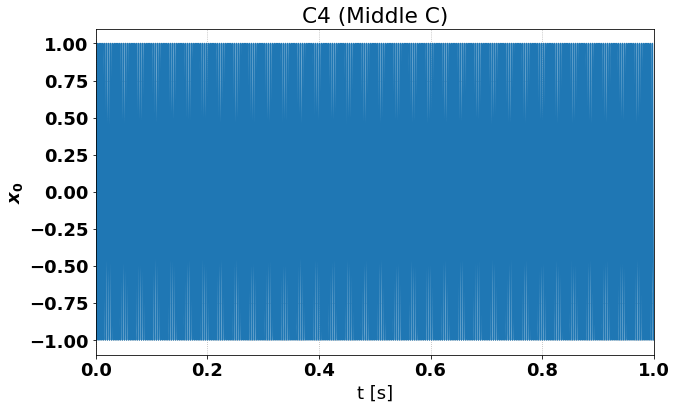

In [7]:
# Plot the sinusoid.
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(t,x0)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x_0$')
ax.set_title('C4 (Middle C)')
plt.show()

You can see that the signal is changing so fast, we can't see what is happening when we plot the whole thing. So, let's just plot the first 0.1 seconds.

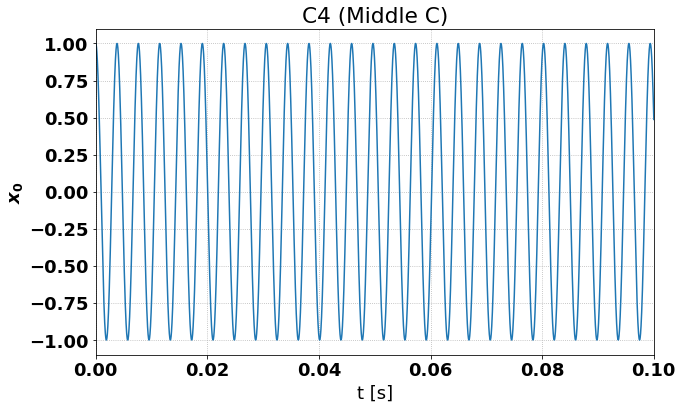

In [8]:
# Plot the sinusoid - first 0.1 seconds.
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(t,x0)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x_0$')
ax.set_title('C4 (Middle C)')
ax.set_xlim(0,0.1)
plt.show()

In [9]:
# We can hear what the sinusoid sounds like if played as a sound.
play(x0, fs)

## Fast Fourier Transform
In class, we learned about the Fourier Transform which maps analog signals from the time domain to the frequency domain. When working with digital signals on a computer, we need to use a special version of the Fourier Transform known as the Discrete Fourier Transform (DFT). The DFT is usually implemented in the computer with an algorithm known as the Fast Fourier Transform, or FFT. We won't go into the theory of the DFT or FFT today, but we will learn some of basics of using the Numpy FFT library for simple freuquency analysis.

### Windowing
One key concept when working with the FFT is the windowing function. The FFT assumes the input signal is one period of a periodic signal. If the beginning and end of the input signal do not smoothly join, this is equivalent to a discontinuity and will introduce artifical high frequency components. **The easiest way to guarantee that the beginning and end of the input signal do join smoothly is to multiply the input signal by an appropriate windowing function that goes smoothly to zero at each end.** In this exercise, we will use the [Hanning Window](https://en.wikipedia.org/wiki/Hann_function), which is commonly used for this purpose.

In [10]:
han_win = np.hanning(len(x0))
x0_han = x0*han_win

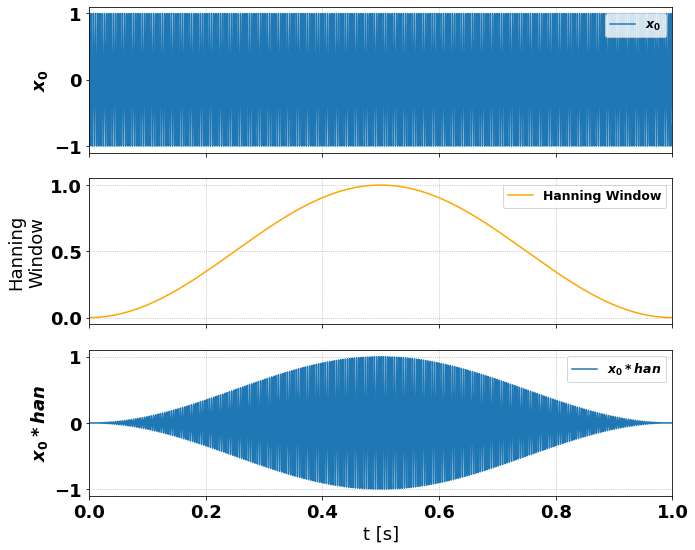

In [11]:
# Plot the sinusoid - first 0.1 seconds.
fig = plt.figure(figsize=(10,8))

ax  = fig.add_subplot(3,1,1)
lbl = '$x_0$'
ax.plot(t,x0,label=lbl)
ax.set_xticklabels([])
ax.set_ylabel('$x_0$')
ax.legend(loc='upper right',fontsize='x-small')

ax  = fig.add_subplot(3,1,2)
lbl = 'Hanning Window'
ax.plot(t,han_win,label=lbl,color='orange')
ax.set_xticklabels([])
ax.set_ylabel('Hanning\nWindow')
ax.legend(loc='upper right',fontsize='x-small')

ax  = fig.add_subplot(3,1,3)
lbl = '$x_0*han$'
ax.plot(t,x0_han,label=lbl)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x_0*han$')
ax.legend(loc='upper right',fontsize='x-small')

fig.tight_layout()
plt.show()

### FFT Computation
We now use the windowed version of the signal to compute the FFT.

**Important Notes**
1. For a sinusoid, we expect two delta functions with a weight of 0.5 at $\pm F_0$. To correctly calculate the amplitude we need to multiply the FFT answer by $2T_s$. Multiplying by $T_s$ is to account for the width of the sampling period. Multiplying by 2 is the correction factor for the Hanning Window that was applied earlier.
2. Remember that the Fourier Transform computes values for both positive and negative frequencies. The FFT does this, too. But, the resulting vector produced by the FFT algorithm gives the positive frequencies first followed by the negative freuqencies. To put the values in the proper order, we use np.fft.fftshift().

In [12]:
# Compute the FFT.
X0 = np.fft.fft(x0_han)*Ts*2

# Reorder values so they go in frequency order from negative to positive.
X0 = np.fft.fftshift(X0)

In [13]:
# Print the resulting FFT X0
X0

array([7.74755758e-16-1.76150326e-17j, 8.20124446e-16+6.33027177e-18j,
       7.34541665e-16+4.04906973e-17j, ...,
       7.31986112e-16-3.93054073e-17j, 8.23007965e-16-5.41272870e-18j,
       7.76359385e-16+1.61980014e-17j])

### FFT Frequency Vector
But what are the frequencies that are actually being computed? The FFT will compute for frequencies from -Nyquist to +Nyquist, evenly spaced by the number of samples in the original signal. The function ``np.fft.fftfreq()`` will conveniently calculate the frequency vector for you in Hz, given the integer length of the input signal and the sampling period in seconds. Note that ``np.fft.fftfreq()`` matches ``np.fft.fft()``. So, we will also want to shift the order of the frequency vector.

In [14]:
f = np.fft.fftfreq(len(X0),Ts)
f = np.fft.fftshift(f)

Note that you can get help about a particular command using ``pinfo``. Take a moment to read the documentation string for ``np.fft.fftfreq()``.

In [15]:
pinfo np.fft.fftfreq

Signature: np.fft.fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1

### FFT Plotting
Now that we have both the FFT values

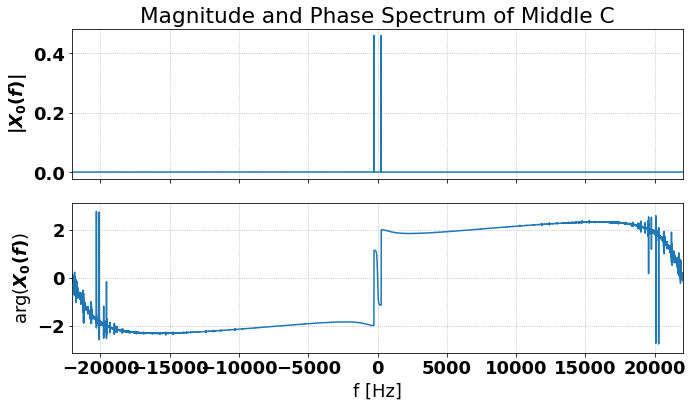

In [16]:
fig = plt.figure()

ax = fig.add_subplot(2,1,1)
ax.plot(f,np.abs(X0))
ax.set_xticklabels([])
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude and Phase Spectrum of Middle C')

ax = fig.add_subplot(2,1,2)
ax.plot(f,np.angle(X0))
ax.set_xlabel('f [Hz]')
ax.set_ylabel('arg($X_0(f)$)')
ax.set_ylim(-np.pi,np.pi)

fig.tight_layout()
plt.show()

We expect the theoretical answer to be
$$X(f) = \frac{1}{2} \left[ \delta(f+F_0) + \delta(f-F_0) \right]$$

The FFT phase plot (bottom) is not zero, as we would expect. Phase calculation is a bit more complicated with FFT, so let's ignore this for today and just focus on the magnitude plot. In fact, we can zoom in on the magnitude plot to see just the frequencies of interest. Sure enough, they match the theoretical answer:

We expect the theoretical answer to be
$$X(f) = \frac{1}{2} \left[ \delta(f+F_0) + \delta(f-F_0) \right]$$

The FFT phase plot (bottom) is not zero, as we would expect. Phase calculation is a bit more complicated with FFT, so let's ignore this for today and just focus on the magnitude plot. In fact, we can zoom in on the magnitude plot to see just the frequencies of interest. Sure enough, they match the theoretical answer:

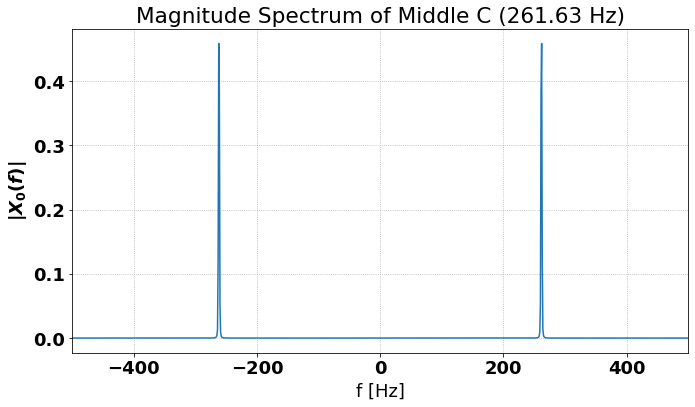

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.plot(f,np.abs(X0))
ax.set_xlim(-500,500)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of Middle C (261.63 Hz)')
fig.tight_layout()
plt.show()

To compare it with the WAV file later, also plot the magnitude with f=(-5000,5000):

To compare it with the WAV file later, also plot the magnitude with f=(-5000,5000):

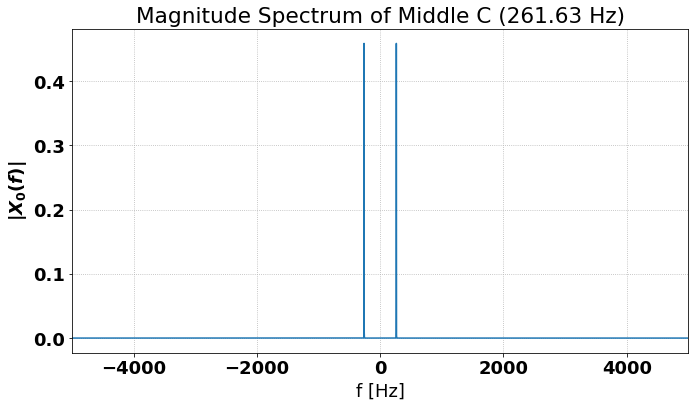

In [18]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.plot(f,np.abs(X0))
ax.set_xlim(-5000,5000)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of Middle C (261.63 Hz)')
fig.tight_layout()
plt.show()

# Analyzing a WAV File
Uncompressed music and sounds are often stored as WAV files on the computer. Let's load in, plot, and listen to a MIDI representation of Middle C being played on a piano.

# Analyzing a WAV File
Uncompressed music and sounds are often stored as WAV files on the computer. Let's load in, plot, and listen to a MIDI representation of Middle C being played on a piano.

### Loading the WAV File
We are using monoaural WAV files with 44.1 kHz sampling in this exercise.

In [19]:
fname = 'Middle_C.wav'

# Load in the file and detect the sampling frequency
fs_wav0, wav0 = wavfile.read(fname)

# Create a new time vector
t_wav0 = np.arange(len(wav0))*(1/fs)

### Playing the Wave File

### Playing the Wave File

In [20]:
# Using the sounddevice library, we can hear what the sinusoid sounds like if played as
play(wav0, fs_wav0)

### Time Domain Plot

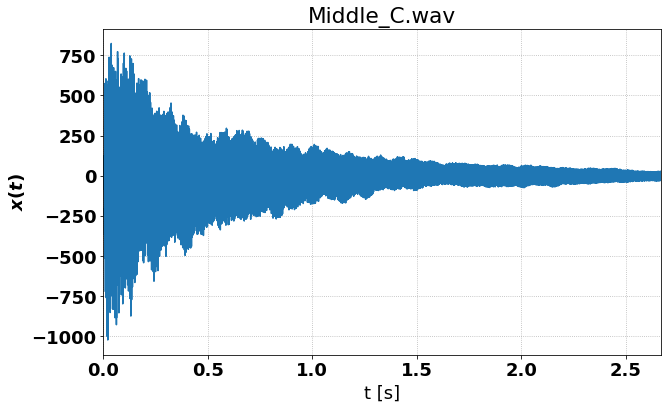

In [21]:
# Plot the sinusoid - first 0.1 seconds.
fig = plt.figure()

ax  = fig.add_subplot(1,1,1)
ax.plot(t_wav0,wav0)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x(t)$')
ax.set_title(fname)
plt.show()

### Frequency Domain (Spectrum) Plot
For today, let's just look at the magnitude spectrum and not the phase spectrum.

In [22]:
# Compute and Apply the Hanning Window
han_win_wav0 = np.hanning(len(wav0))
wav0_han = wav0*han_win_wav0

# Compute the FFT and shift element order.
WAV0 = np.fft.fft(wav0_han)*(1/fs_wav0)*2
WAV0 = np.fft.fftshift(WAV0)

wav0_f = np.fft.fftfreq(len(WAV0),1/fs_wav0)
wav0_f = np.fft.fftshift(wav0_f)

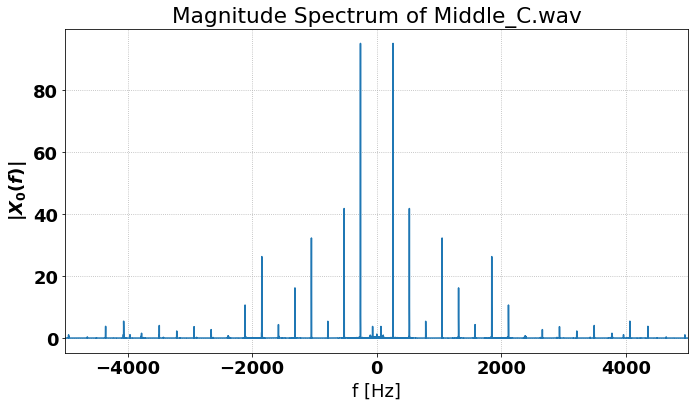

In [23]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(wav0_f,np.abs(WAV0))
ax.set_xlim(-5000,5000)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of {!s}'.format(fname))

fig.tight_layout()
plt.show()

# Questions

#### 1. Why does the FFT Magnitude Spectrum of ``Middle_C.wav`` look so different than that of the pure sinusoid we generated at the beginning of the notebook?
The sound in the ``Middle_C.wav`` is a note played on the piano. A piano note contains more frequency components than just the main sinuoid of $261.63Hz$. In a real-world senario, when a string vibrates, it does not necessarily vibrate at just one frequency. It may also produces other frequencies which are integral multiples of the prominent frequency, as we can see in the plot of the magnitude spectrum. The values at frequencies other than the harmonics are neglectible.
#### 2. Describe the differences you hear between playing the audio of the pure sine wave versus ``Middle_C.wav``.
The pure wave has a constant volume, and sounds like the sound from a Morse code machine or the music from old 8-bit video games. On the other hand, the sound from ``Middle_C.wav`` has a volume that decreases over time. It also sounds more "mechaninal", and more natural.

#### 3. Looking at the Magnitude Spectrum of ``Middle_C.wav``, how can you determine from the plotted spectrum that this note is in fact Middle C?
By inspection, the two spikes near zero are the main feature of this spectrumm. If we look closer at the magnitude Spectrum of the sound from ``Middle_C.wav``, we can see that this frequency should be somewhere between $250Hz$ and $300Hz$. The only piano note with frequency in this range is Middle C, $C_4$ with a frequency of $261.6256Hz$.

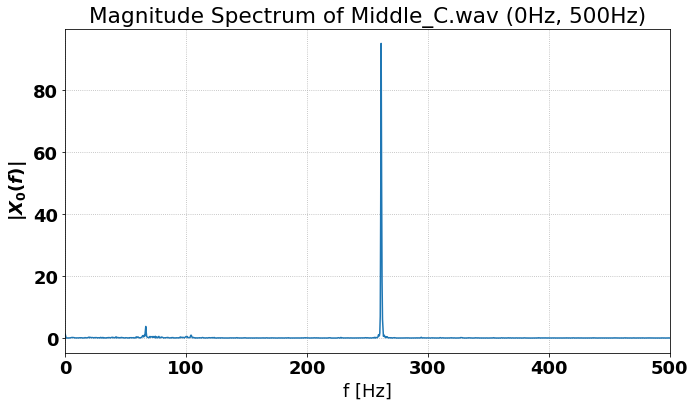

In [24]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(wav0_f,np.abs(WAV0))
ax.set_xlim(0,500)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of {!s} (0Hz, 500Hz)'.format(fname))
fig.tight_layout()
plt.show()

#### 4. Notice that the time domain waveform of ``Middle_C.wav`` changes with time, whereas the pure sine wave does not. Is computing a single FFT for ``Middle_C.wav`` appropriate? Why or why not?
Computing a single FFT for ``Middle_C.wav`` is appropriate. Physically, after a piano note is played, the pitch or frequency of the sound does not change, only its loudness or magnitude. The main characteristics of the output of the FFT should not be affected.

#### 5. Analyze the file ``mystery_note.wav`` the same way you analyzed ``Middle_C.wav``. Make sure you include all of the plots below, and listen to the note. Using https://en.wikipedia.org/wiki/Piano_key_frequencies, determine what note ``mystery_note.wav`` contains.

In [25]:
# Loading the mystery WAV file
mfname = 'mystery_note.wav'

# Load in the file and detect the sampling frequency
fs_myst, myst = wavfile.read(mfname)

# Create a new time vector
t_myst = np.arange(len(myst))*(1/fs)

# Play the sound
play(myst, fs_myst)

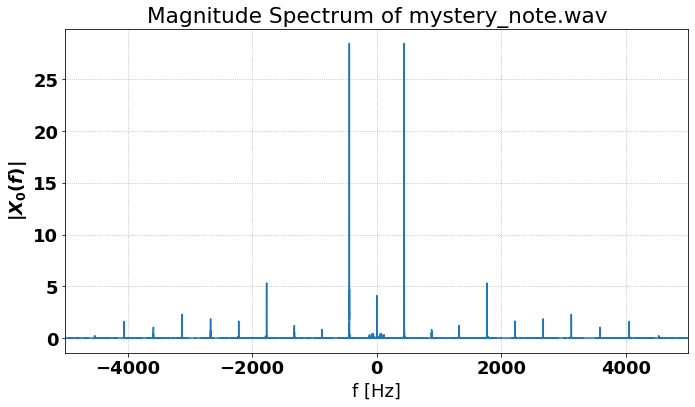

In [26]:
# Compute and Apply the Hanning Window
han_win_myst = np.hanning(len(myst))
myst_han = myst*han_win_myst

# Compute the FFT and shift element order.
MYST = np.fft.fft(myst_han)*(1/fs_myst)*2
MYST = np.fft.fftshift(MYST)

myst_f = np.fft.fftfreq(len(MYST),1/fs_myst)
myst_f = np.fft.fftshift(myst_f)

# Plot the magnitude spectrum of the sound
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(myst_f,np.abs(MYST))
ax.set_xlim(-5000,5000)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of {!s}'.format(mfname))

fig.tight_layout()
plt.show()

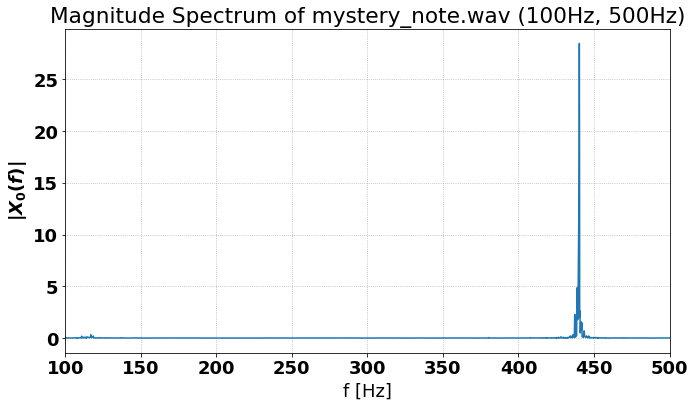

In [27]:
# Zoom out on the magnitude spectrum between 100Hz and 500Hz
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(myst_f,np.abs(MYST))
ax.set_xlim(100,500)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$|X_0(f)|$')
ax.set_title('Magnitude Spectrum of {!s} (100Hz, 500Hz)'.format(mfname))

fig.tight_layout()
plt.show()

**Conlusion**: By inspection, we can see that the most important feature of the plot above is a frequency in the range from 425Hz to 450Hz. The only piano note in this range is $A_4$ with a frequency of $440Hz$.

#### 6. Show that you can increase the volume on ``mystery_note.wav`` simply by multiplying the signal by a constant (like 2). Plot the resulting time domain signal and play the note so you can hear the difference.

In [28]:
# Play the original mystery sound
play(myst, fs_myst)

In [29]:
# Multiply signal by a constant
mod_sig = 0.00005*myst

play(mod_sig, fs_myst, normalize=False)

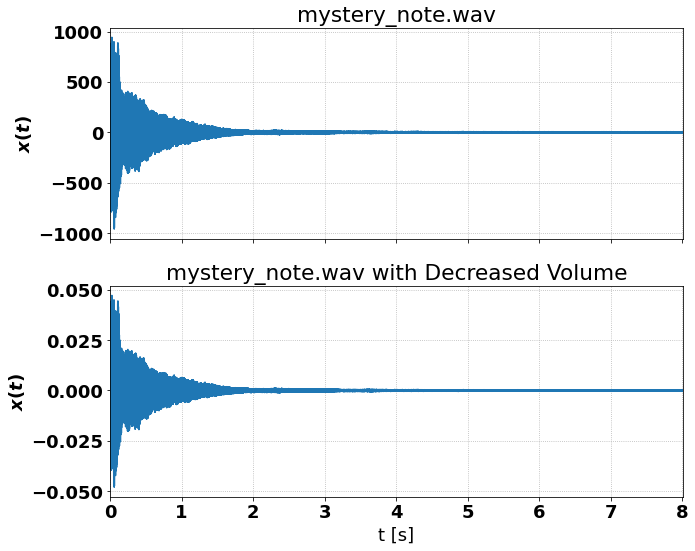

In [30]:
# Plot the graphs for both sounds for comparison
fig = plt.figure(figsize=(10,8))

# Plot the original signal
ax = fig.add_subplot(2,1,1)
ax.plot(t_myst,myst)
ax.set_xticklabels([])
ax.set_ylabel('$x(t)$')
ax.set_title(mfname)

# Plot the adjusted signal for comparison
ax = fig.add_subplot(2,1,2)
ax.plot(t_myst,mod_sig)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x(t)$')
ax.set_title(mfname + " with Decreased Volume")

fig.tight_layout()
plt.show()

#### 7. Tell me two things that you learned from this take-home exercise.
- There are easy-to-use Python functions such as the Fast Fourier Transform functions for digital signal processing applications.
- A musical note most likely does not contain a single frequency. And the Fourier transform techniques are the perfect tools to reveal the other frequencies, usually unnoticeable by the human ears.

#### 8. Tell me two things that you did not understand and want more explanation of.
- I would like more details on the Fast Fouriere transform. Specifically, how much more efficiency is the FFT compared to the regular Fourier transform?
- Intuitively, a pure frequency should be a more "perfect" form of the sound. Why would the human ears prefer the "noisier" sounds?